
# GINI Water Vapor Imagery

Use MetPy's support for GINI files to read in a water vapor satellite image and plot the
data using CartoPy.


In [1]:
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr

from metpy.cbook import get_test_data
from metpy.io import GiniFile
from metpy.plots import add_metpy_logo, add_timestamp, colortables

In [2]:
# Open the GINI file from the test data
f = GiniFile(get_test_data('WEST-CONUS_4km_WV_20151208_2200.gini'))
print(f)

GiniFile: GOES-15 West CONUS WV (6.5/6.7 micron)
	Time: 2015-12-08 22:00:19
	Size: 1280x1100
	Projection: lambert_conformal
	Lower Left Corner (Lon, Lat): (-133.4588, 12.19)
	Resolution: 4km


Get a Dataset view of the data (essentially a NetCDF-like interface to the
underlying data). Pull out the data and (x, y) coordinates. We use `metpy.parse_cf` to
handle parsing some netCDF Climate and Forecasting (CF) metadata to simplify working with
projections.



In [3]:
ds = xr.open_dataset(f)
x = ds.variables['x'][:]
y = ds.variables['y'][:]
dat = ds.metpy.parse_cf('WV')

Plot the image. We use MetPy's xarray/cartopy integration to automatically handle parsing
the projection information.



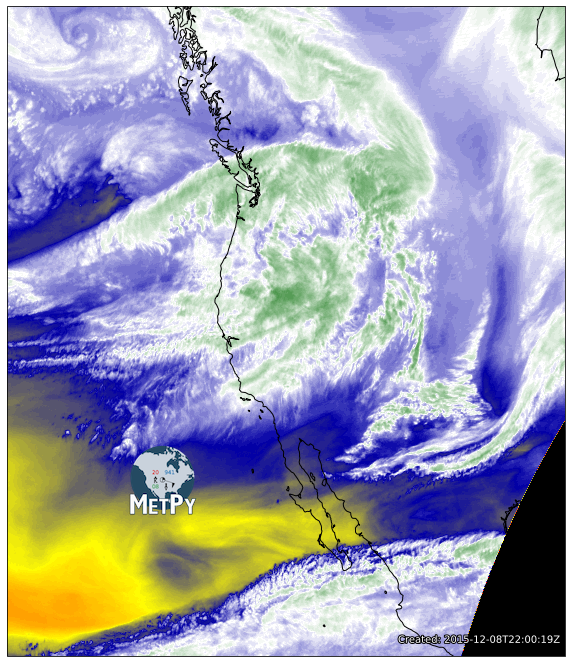

In [4]:
fig = plt.figure(figsize=(10, 12))
add_metpy_logo(fig, 125, 145)
ax = fig.add_subplot(1, 1, 1, projection=dat.metpy.cartopy_crs)
wv_norm, wv_cmap = colortables.get_with_range('WVCIMSS', 100, 260)
wv_cmap.set_under('k')
im = ax.imshow(dat[:], cmap=wv_cmap, norm=wv_norm,
               extent=(x.min(), x.max(), y.min(), y.max()), origin='upper')
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
add_timestamp(ax, f.prod_desc.datetime, y=0.02, high_contrast=True)

plt.show()